<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [12]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

### Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', names=names, sep=r"\s+")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Нарисовать частотные графики для всех значений. 

Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



### Какие дискретные а какие непрерывные



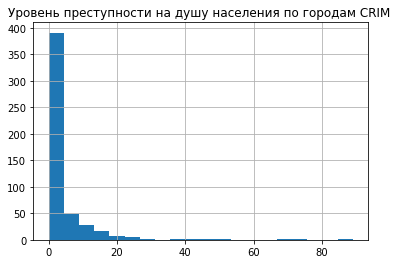

In [23]:
df.CRIM.hist(bins=20) 
plt.title('Уровень преступности на душу населения по городам CRIM ')
plt.show()

Непрерывное экспоненциальное

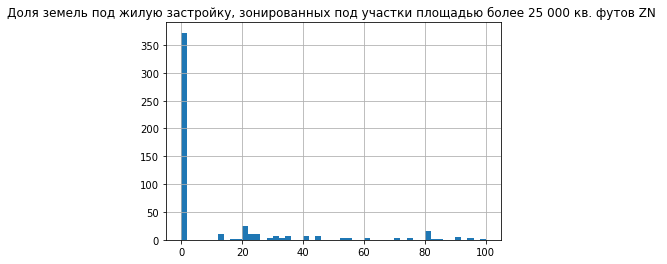

In [90]:
df.ZN.hist(bins=50) 
plt.title('Доля земель под жилую застройку, зонированных под участки площадью более 25 000 кв. футов ZN ')
plt.show()

In [8]:
df['ZN'].nunique()

26

Дискретное геометрическое

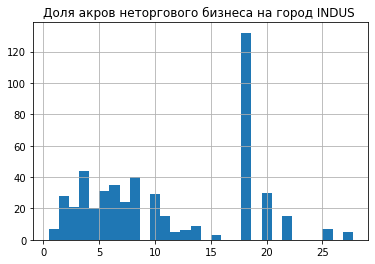

In [93]:
df.INDUS.hist(bins=30) 
plt.title('Доля акров неторгового бизнеса на город INDUS ')
plt.show()

Непрерывное

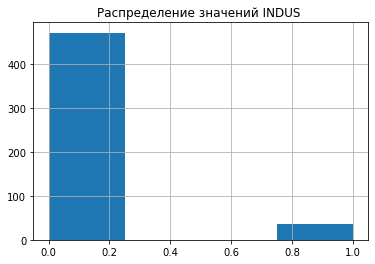

In [32]:
df.CHAS.hist(bins=4) 
plt.title('Распределение значений INDUS ')
plt.show()

Распределение Бернулли. Переменная дискретная, принимает только 2 значения: 0 и 1

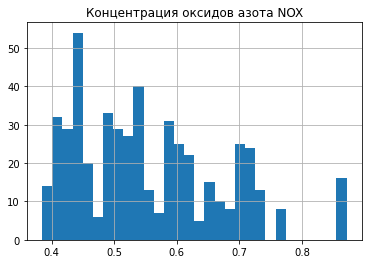

In [42]:
df.NOX.hist(bins=30) 
plt.title('Концентрация оксидов азота NOX')
plt.show()

Логнормальное непрерывное распределение

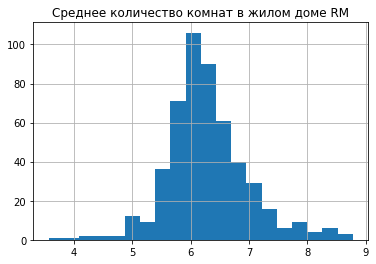

In [46]:
df.RM.hist(bins=20) 
plt.title('Среднее количество комнат в жилом доме RM')
plt.show()

Нормальное распределение

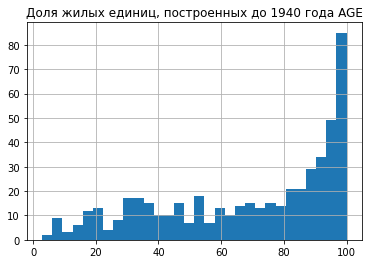

In [49]:
df.AGE.hist(bins=30) 
plt.title('Доля жилых единиц, построенных до 1940 года AGE')
plt.show()

Непрерывное

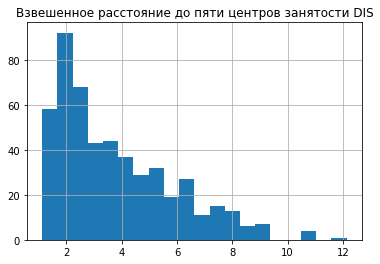

In [51]:
df.DIS.hist(bins=20) 
plt.title('Взвешенное расстояние до пяти центров занятости DIS')
plt.show()

Логнормальное распределение

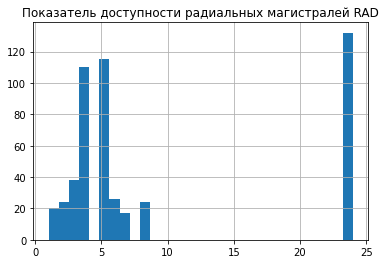

In [68]:
df.RAD.hist(bins=30) 
plt.title('Показатель доступности радиальных магистралей RAD')
plt.show()

Дискретная случайная величина, стремится к равномерному

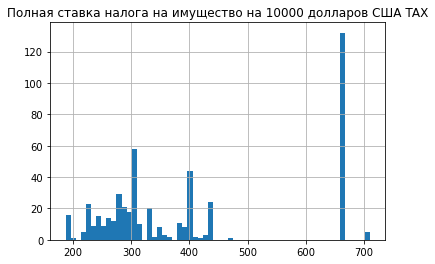

In [73]:
df.TAX.hist(bins=60) 
plt.title('Полная ставка налога на имущество на 10000 долларов США TAX')
plt.show()

Непрерывное

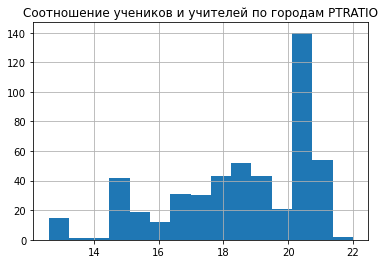

In [78]:
df.PTRATIO.hist(bins=15) 
plt.title('Соотношение учеников и учителей по городам PTRATIO')
plt.show()

Непрерывное

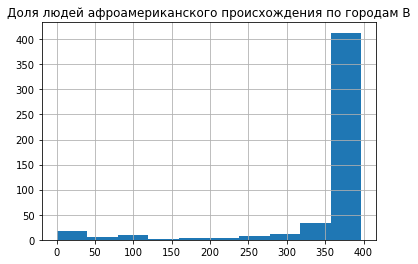

In [81]:
df.B.hist(bins=10) 
plt.title('Доля людей афроамериканского происхождения по городам B')
plt.show()

Непрерывное

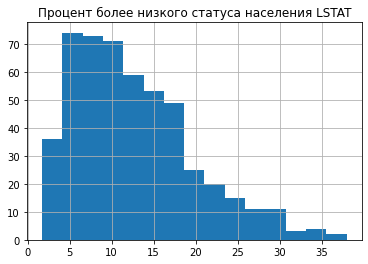

In [84]:
df.LSTAT.hist(bins=15) 
plt.title('Процент более низкого статуса населения LSTAT')
plt.show()

Непрерывное логнормальное

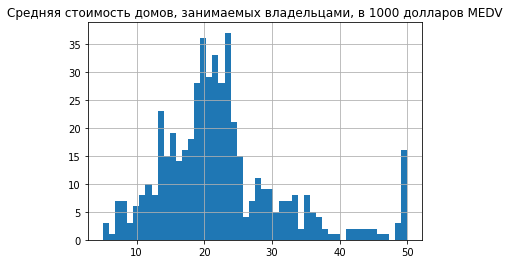

In [95]:
df.MEDV.hist(bins=50) 
plt.title('Cредняя стоимость домов, занимаемых владельцами, в 1000 долларов MEDV')
plt.show()

Непрерывное нормальное

### Попарные графики всех параметров

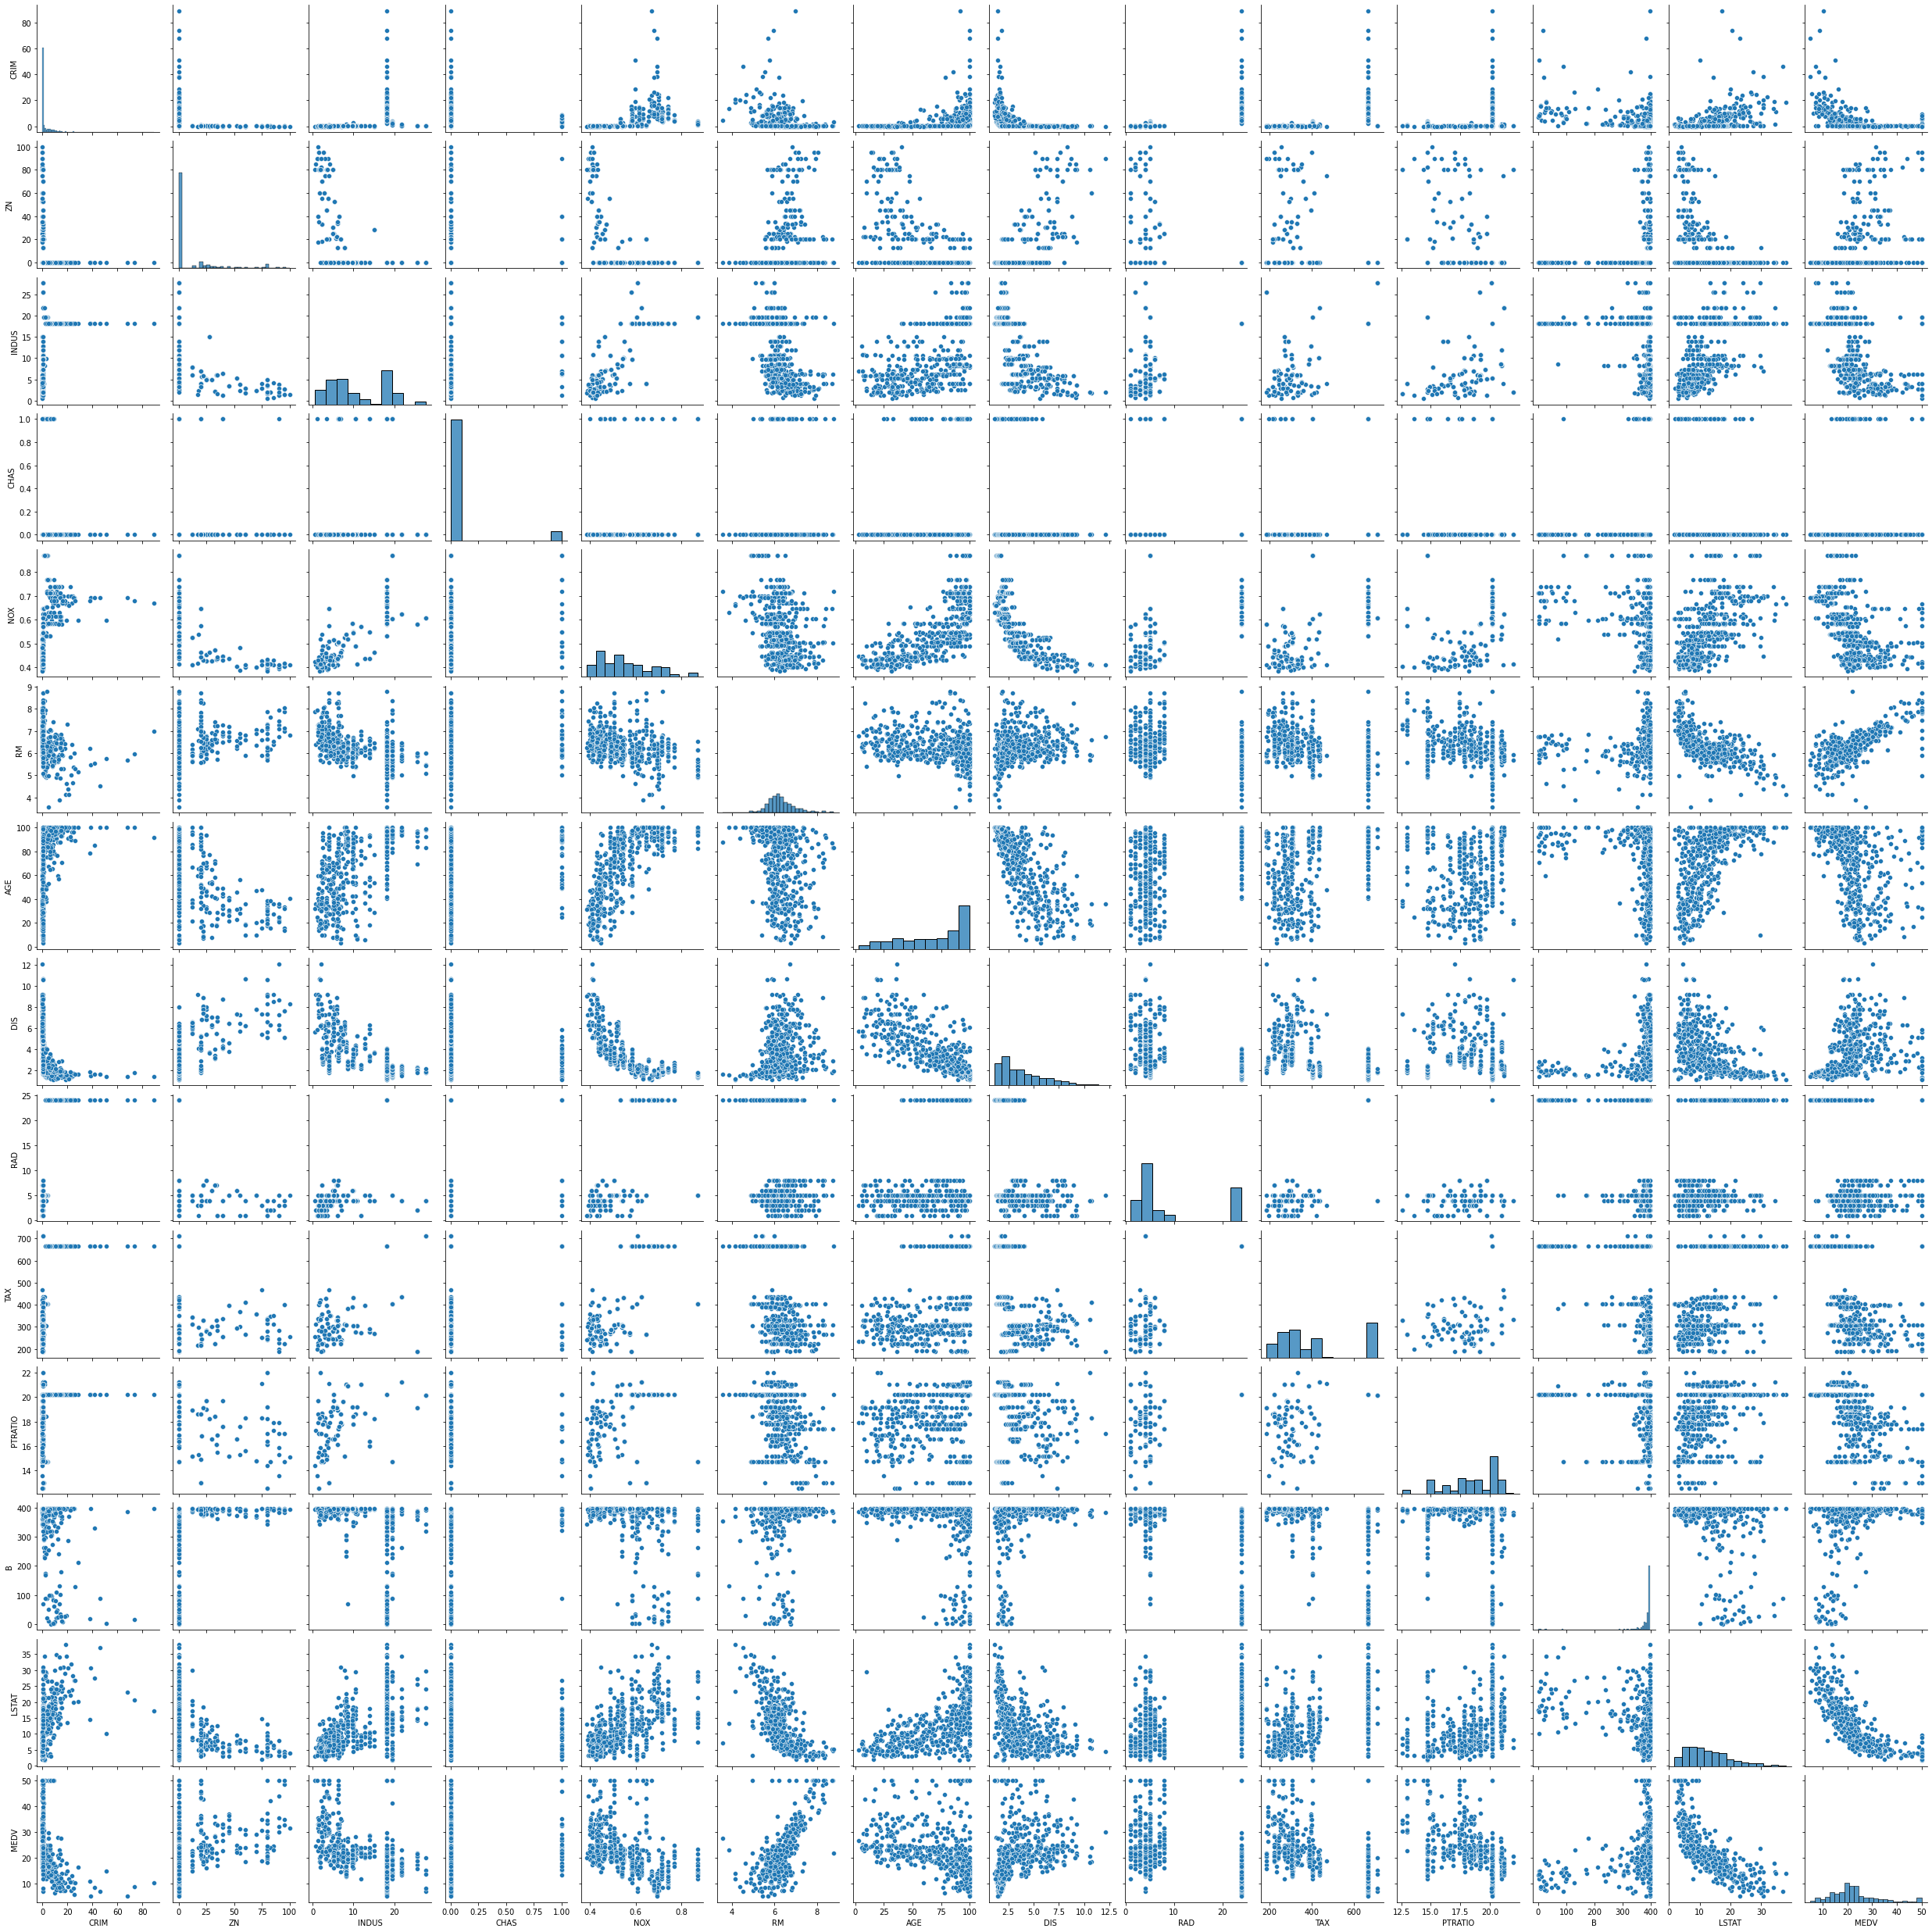

In [9]:
sns_plot = sns.pairplot(
    df)
sns_plot

### Написать **линейную регрессию** на два атрибута. 

Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

Построим скаттер плот чтобы посмотреть зависимость двух переменных

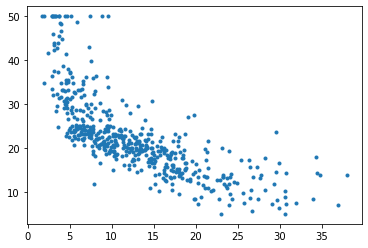

In [12]:
plt.scatter(df['LSTAT'], df['MEDV'], marker='.')
plt.show()

Собственное значение:  16.51 Собственный вектор:  [-0.81472626 -0.57984577]


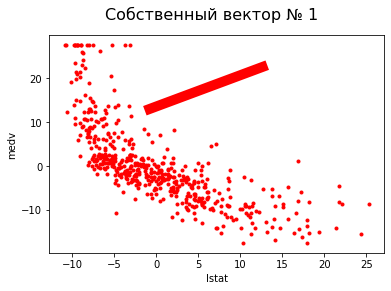

Собственное значение:  119.07 Собственный вектор:  [ 0.57984577 -0.81472626]


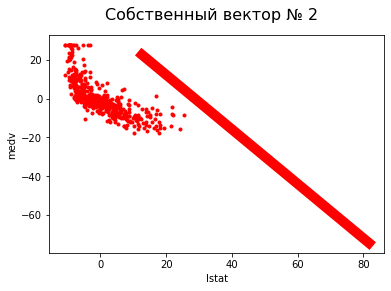

In [15]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler
lstat = df['LSTAT'] #выборка 1
medv = df['MEDV'] #выборка 2
mean1 = statistics.mean(lstat)
lstat -= mean1 # вычли из данных среднее значение
mean2 = statistics.mean(medv)
medv -= mean2
Y = np.vstack((lstat, medv)).T #создали табличку из полученных данных (2 колонки вертикально), потом транспонируем
w,v = la.eig(np.cov(Y.T)) #матрица ковариаций, затем считаем собственный вектор (v) и собственное значение(w)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(lstat, medv, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('lstat')
    plt.ylabel('medv')
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='red', linewidth=10)
    plt.show()

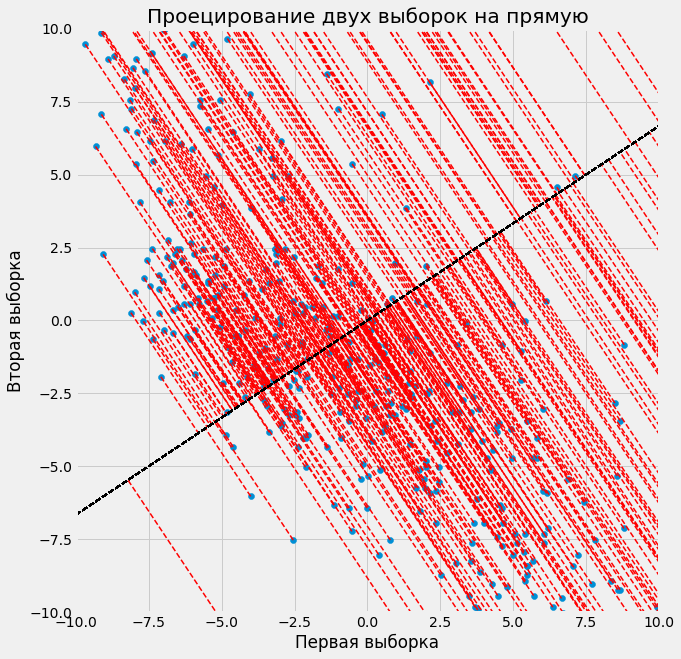

In [17]:
#import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
#from sklearn.preprocessing import StandardScaler

# табличка из двух столбиков в виде списка: первое значение - первый столбик, второй элемент - второй столбик
df1 = df[['LSTAT', 'MEDV']]
# Нормализуем данные
df1 = StandardScaler(with_std=False,copy=False).fit_transform(df1)

fig = plt.figure(figsize=(10,10)) #строим фигуру
ax0 = fig.add_subplot(111)
ax0.set_aspect('equal') # одинаковое масштабирование
ax0.set_xlim((-10,10))
ax0.set_ylim((-10,10))

ax0.scatter(df1[:,0],df1[:,1]) # Строим скаттер - то как эти точки расположены в пространстве


# пробегаем по всем элементам таблички
#
for i in range(len(df1[:,0])):

    # строим прямую v (от начала координат до точки 3 и 2 х у)
    v = np.array([3,2])
    ax0.plot(np.linspace(-10,10),np.linspace(-10,10)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5)   

    # 2 выборки заданы в векторе A. Построим точку w из текущего значения двух выборок
    #  проецируем точки
    w = np.array([df1[i][0],df1[i][1]])

    # строим проекцию данной точки w на вектор v: cv
    # 0 так как начало координат
    # считаем координаты спроецированной точки
    cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

    # линия между v и cv (то есть между данной точкой и спроецированной точкой)
    ax0.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)


    # проверить результат
#    print(np.dot((w-cv),cv))
plt.xlabel('Первая выборка')
plt.ylabel('Вторая выборка')
plt.title('Проецирование двух выборок на прямую')
plt.show()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



### Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [51]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


напишите код, кот будет рисовать распределения попарно - точечные значения



сделать матрицу корреляций и ковариаций

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть **отсутствующие значения в выборке country**, убрать (drop). Написать код.

In [52]:
print('В таблице отсуттствуют значения:', data.isnull().sum())

В таблице отсуттствуют значения: Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64


In [53]:
data.shape

(156, 11)

In [54]:
data.dropna()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


Сколько стран в выборке? Написать ответ.

In [55]:
data['Country (region)'].nunique()

156

сделать классификационный график по странам

### Добавить новую колонку в таблицу - 'continent'. 

Каждая страна относится к определенному материку. Всего материков 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Как определить, к какому материку относится тот или иной элемент? 
Можно написать словарь, в котором ключ - страна, а значение - это материк для данной страны.

Список стран по континентам: https://simple.wikipedia.org/wiki/List_of_countries_by_continents. 

Как работать со словарями - https://pythonworld.ru/tipy-dannyx-v-python/slovari-dict-funkcii-i-metody-slovarej.html


Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента, это **проблема классификации**. 

In [56]:
df = pd.read_csv('countries.csv', on_bad_lines='skip')
df.head()

,place,pop2022,growthRate,area,country,cca3,cca2,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,continent,rank
0,12,44903225.0,0.01642,2381741.0,Algeria,DZA,DZ,12,Africa,Northern Africa,2381741.0,18.8531,48.8296,34,Africa,34
1,434,6812341.0,0.01144,1759540.0,Libya,LBY,LY,434,Africa,Northern Africa,1759540.0,3.8717,10.0276,107,Africa,107
2,504,37457971.0,0.01029,446550.0,Morocco,MAR,MA,504,Africa,Northern Africa,446300.0,83.9300,217.3788,40,Africa,40
3,729,46874204.0,0.02666,1886068.0,Sudan,SDN,SD,729,Africa,Northern Africa,1868000.0,25.0933,64.9915,32,Africa,32
4,788,12356117.0,0.00760,163610.0,Tunisia,TUN,TN,788,Africa,Northern Africa,155360.0,79.5322,205.9883,79,Africa,79


In [57]:
df_countries = df[['country', 'region']]
df_countries.head()

,country,region
0,Algeria,Africa
1,Libya,Africa
2,Morocco,Africa
3,Sudan,Africa
4,Tunisia,Africa


In [58]:
countries_by_continent = df_countries.set_index('country').T.to_dict('records')
countries_by_continent

[{'Algeria': 'Africa',
  'Libya': 'Africa',
  'Morocco': 'Africa',
  'Sudan': 'Africa',
  'Tunisia': 'Africa',
  'Western Sahara': 'Africa',
  'Armenia': 'Asia',
  'Azerbaijan': 'Asia',
  'Brunei': 'Asia',
  'Cambodia': 'Asia',
  'China': 'Asia',
  'Georgia': 'Asia',
  'Hong Kong': 'Asia',
  'Indonesia': 'Asia',
  'Japan': 'Asia',
  'Kazakhstan': 'Asia',
  'Laos': 'Asia',
  'Macau': 'Asia',
  'Malaysia': 'Asia',
  'Mongolia': 'Asia',
  'Myanmar': 'Asia',
  'North Korea': 'Asia',
  'Philippines': 'Asia',
  'Singapore': 'Asia',
  'South Korea': 'Asia',
  'Taiwan': 'Asia',
  'Thailand': 'Asia',
  'Timor-Leste': 'Asia',
  'Vietnam': 'Asia',
  'Albania': 'Europe',
  'Andorra': 'Europe',
  'Austria': 'Europe',
  'Belarus': 'Europe',
  'Belgium': 'Europe',
  'Bosnia and Herzegovina': 'Europe',
  'Bulgaria': 'Europe',
  'Croatia': 'Europe',
  'Czech Republic': 'Europe',
  'Denmark': 'Europe',
  'Estonia': 'Europe',
  'Faroe Islands': 'Europe',
  'Finland': 'Europe',
  'France': 'Europe',
  'Ge

In [59]:
continent = {}
for rec in countries_by_continent:
   continent.update(rec)
continent

{'Algeria': 'Africa',
 'Libya': 'Africa',
 'Morocco': 'Africa',
 'Sudan': 'Africa',
 'Tunisia': 'Africa',
 'Western Sahara': 'Africa',
 'Armenia': 'Asia',
 'Azerbaijan': 'Asia',
 'Brunei': 'Asia',
 'Cambodia': 'Asia',
 'China': 'Asia',
 'Georgia': 'Asia',
 'Hong Kong': 'Asia',
 'Indonesia': 'Asia',
 'Japan': 'Asia',
 'Kazakhstan': 'Asia',
 'Laos': 'Asia',
 'Macau': 'Asia',
 'Malaysia': 'Asia',
 'Mongolia': 'Asia',
 'Myanmar': 'Asia',
 'North Korea': 'Asia',
 'Philippines': 'Asia',
 'Singapore': 'Asia',
 'South Korea': 'Asia',
 'Taiwan': 'Asia',
 'Thailand': 'Asia',
 'Timor-Leste': 'Asia',
 'Vietnam': 'Asia',
 'Albania': 'Europe',
 'Andorra': 'Europe',
 'Austria': 'Europe',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Bosnia and Herzegovina': 'Europe',
 'Bulgaria': 'Europe',
 'Croatia': 'Europe',
 'Czech Republic': 'Europe',
 'Denmark': 'Europe',
 'Estonia': 'Europe',
 'Faroe Islands': 'Europe',
 'Finland': 'Europe',
 'France': 'Europe',
 'Germany': 'Europe',
 'Gibraltar': 'Europe',
 '

In [64]:
def find_continent(x):
    for k, v in continent.items():
        if k == x:
            return v

  

data['continent'] = data['Country (region)'].apply(find_continent)




In [65]:
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
 11  continent                68 non-null     object 
dtypes: float64(8), int64(2), object(2)
memory usage: 14.8+ KB


### Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

In [0]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='continent')
plt.show()

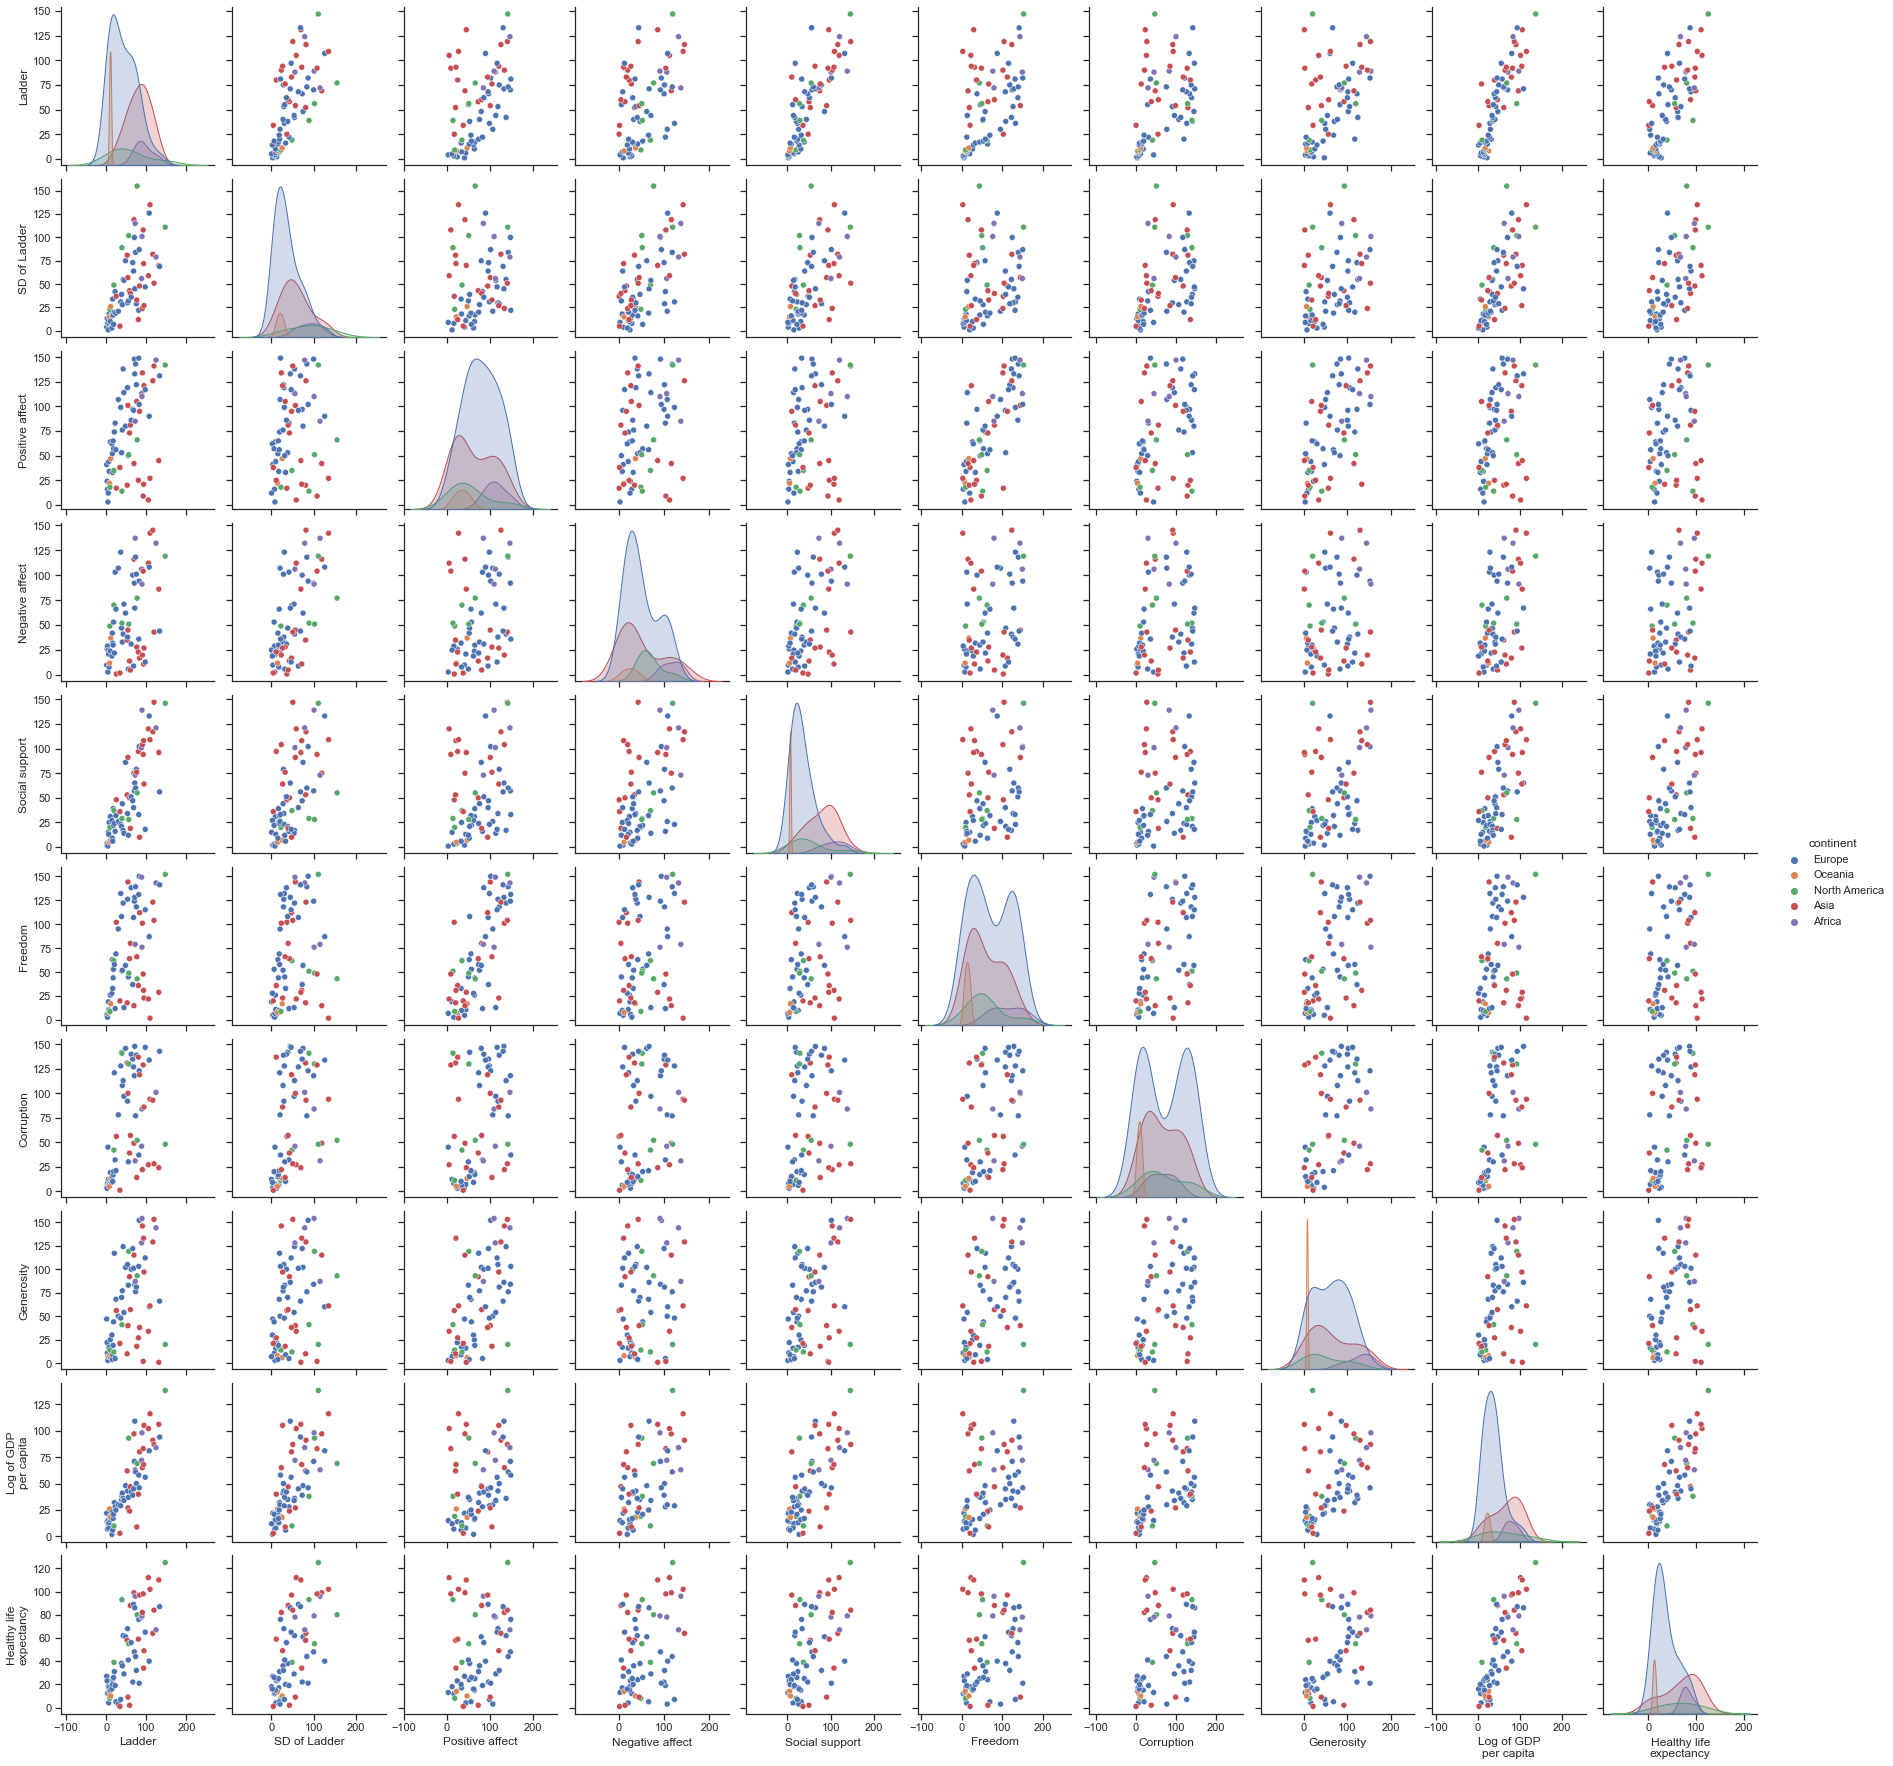

In [67]:

sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='continent')
plt.show()

In [ ]:
Европа и Азия похожи между собой

### Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

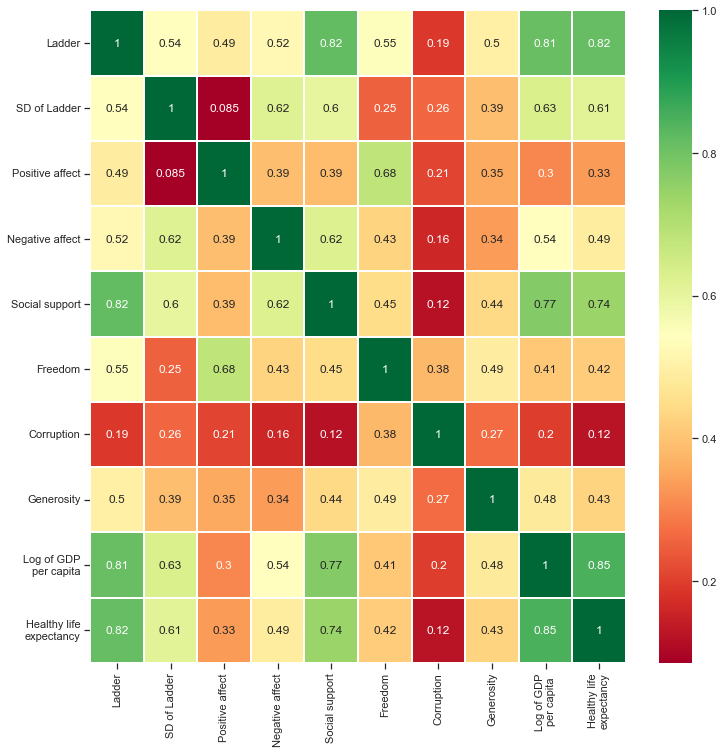

In [68]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()



**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

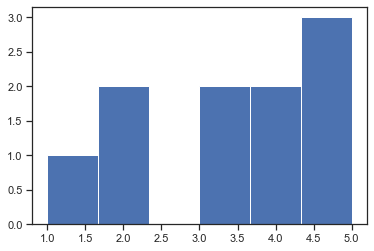

In [84]:
from numpy.random import randint

plt.hist(randint(1, 6, 10), 6) # генерируем 10 значений от 1 до 6, гистограмма на 6 столбцов
plt.show()

Нормальное распределение дискретной случайной величины

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

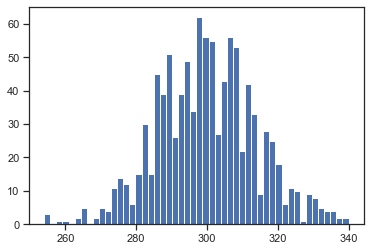

In [85]:
sampleMeans = []

for _ in range(1000):
    sampleMean = sum(randint(1, 6, 100))
    sampleMeans.append(sampleMean) # создаем из суммы равномерных распределений новую выборку
    
plt.hist(sampleMeans, 50)
plt.show()

# если взять 1 выборку, частотный график будет стремиться к квадрату,
# а если увеличить число выборок - к нормальному